# Análisis de Red de Transacciones

Este notebook utiliza la clase `TransactionNetworkAnalyzer` para analizar redes de transacciones de manera interactiva. El análisis incluye:

1. Carga y validación de datos
2. Estadísticas generales de la red
3. Identificación de componentes de alto riesgo
4. Exploración detallada de componentes
5. Análisis de nodos individuales
6. Exportación de resultados

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from transaction_network_analyzer import TransactionNetworkAnalyzer

# Configurar el estilo de las visualizaciones
sns.set_theme()  # Esto aplica el estilo de seaborn
sns.set_palette('husl')

## 1. Carga y Validación de Datos

En esta sección, cargaremos los datos de transacciones y realizaremos una validación inicial.

In [2]:
# Cargar los datos
df = pd.read_csv('test_dataset.csv')  # Usamos el dataset de prueba

# Verificar las columnas requeridas
required_columns = ['origen', 'destino', 'monto_total', 'cantidad_envios']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"Faltan columnas requeridas: {missing_columns}")

# Verificar valores nulos
null_counts = df[required_columns].isnull().sum()
print("Conteo de valores nulos:")
print(null_counts)

# Verificar tipos de datos
print("\nTipos de datos:")
print(df[required_columns].dtypes)

# Verificar valores negativos en amount
negative_amounts = (df['monto_total'] < 0).sum()
print(f"\nCantidad de valores negativos en 'monto_total': {negative_amounts}")

# Resumen de los datos
print("\nResumen de los datos:")
print(df.describe())

Conteo de valores nulos:
origen             0
destino            0
monto_total        0
cantidad_envios    0
dtype: int64

Tipos de datos:
origen             int64
destino            int64
monto_total        int64
cantidad_envios    int64
dtype: object

Cantidad de valores negativos en 'monto_total': 0

Resumen de los datos:
          origen    destino  monto_total  cantidad_envios
count  21.000000  21.000000    21.000000        21.000000
mean    7.571429   8.285714    39.142857         1.809524
std     4.935296   4.828487    60.574158         1.167007
min     1.000000   1.000000     2.000000         1.000000
25%     4.000000   5.000000    10.000000         1.000000
50%     6.000000   8.000000    10.000000         1.000000
75%    13.000000  12.000000    40.000000         2.000000
max    14.000000  15.000000   200.000000         5.000000


## 2. Inicialización y Estadísticas Generales

Crearemos una instancia del analizador y calcularemos las estadísticas básicas de la red.

Estadísticas de la red:
total_nodos: 15
total_aristas: 19
densidad: 0.09047619047619047
num_componentes: 2
tamaño_promedio_componentes: 7.5
monto_total: 802
total_transacciones: 36
monto_promedio_por_transaccion: 22.27777777777778
grado_promedio_entrada: 1.2666666666666666
grado_promedio_salida: 1.2666666666666666
centralidad_promedio: 0.18095238095238095


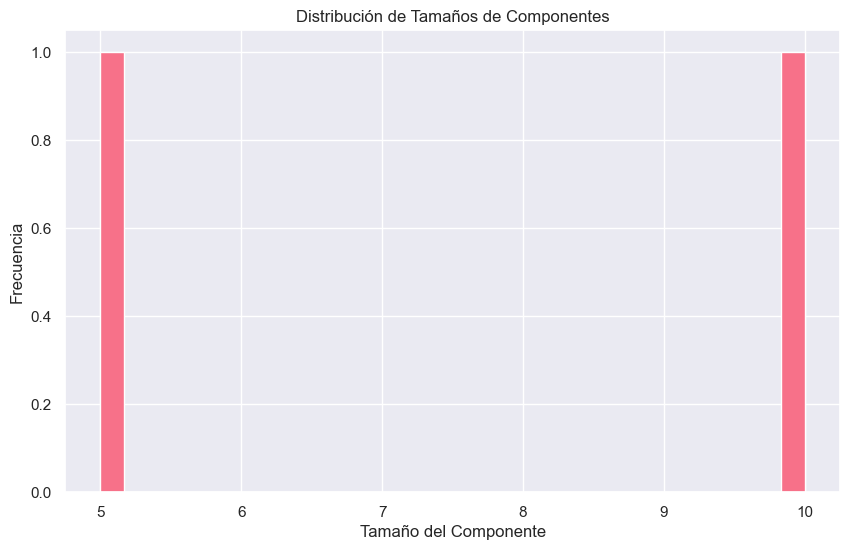

In [3]:
# Inicializar el analizador
analyzer = TransactionNetworkAnalyzer()
analyzer.load_data(df)  # Cargar los datos después de inicializar

# Calcular estadísticas básicas
stats = analyzer.get_network_statistics()

# Mostrar estadísticas
print("Estadísticas de la red:")
for key, value in stats.items():
    print(f"{key}: {value}")

# Visualizar distribución de tamaños de componentes
component_sizes = [len(c) for c in analyzer.components]
plt.figure(figsize=(10, 6))
plt.hist(component_sizes, bins=30)
plt.title('Distribución de Tamaños de Componentes')
plt.xlabel('Tamaño del Componente')
plt.ylabel('Frecuencia')
plt.show()

In [4]:
# Definir umbral de riesgo
risk_threshold = 0.65

# Identificar componentes de alto riesgo
high_risk_components = analyzer.get_high_risk_components(risk_threshold)

## 3. Análisis de Componentes de Alto Riesgo

Identificaremos y analizaremos los componentes que presentan un riesgo significativo.

In [5]:
# Definir umbral de riesgo
risk_threshold = 0.65

# Identificar componentes de alto riesgo
high_risk_components = analyzer.get_high_risk_components(risk_threshold)

# Crear DataFrame con métricas de riesgo
risk_metrics = []
for component_id, risk_score in high_risk_components.items():
    component = analyzer.get_component(component_id)
    metrics = analyzer.calculate_component_metrics(component_id)
    risk_metrics.append({
        'component_id': component_id,
        'risk_score': risk_score,
        'size': len(component),
        'total_amount': metrics['total_amount'],
        'avg_amount': metrics['avg_amount'],
        'density': metrics['density']
    })

risk_df = pd.DataFrame(risk_metrics)

# Mostrar componentes de alto riesgo
print("Componentes de Alto Riesgo:")
print(risk_df)

# Visualizar distribución de puntuaciones de riesgo
plt.figure(figsize=(10, 6))
sns.histplot(data=risk_df, x='risk_score', bins=20)
plt.title('Distribución de Puntuaciones de Riesgo')
plt.xlabel('Puntuación de Riesgo')
plt.ylabel('Frecuencia')
plt.show()

AttributeError: 'list' object has no attribute 'items'

## 4. Exploración Detallada de Componentes

Exploraremos en detalle los componentes seleccionados, incluyendo su estructura y métricas.

In [ ]:
# Seleccionar un componente para análisis detallado
if not risk_df.empty:
    component_id = risk_df['component_id'].iloc[0]  # Primer componente de alto riesgo
else:
    # Si no hay componentes de alto riesgo, tomar el primer componente disponible
    component_id = list(analyzer.get_components())[0]

# Obtener el componente
component = analyzer.get_component(component_id)

# Calcular métricas del componente
metrics = analyzer.calculate_component_metrics(component_id)

# Mostrar métricas
print(f"Métricas del Componente {component_id}:")
for key, value in metrics.items():
    print(f"{key}: {value}")

# Visualizar el componente
plt.figure(figsize=(12, 8))
analyzer.visualize_component(component_id)
plt.title(f'Visualización del Componente {component_id}')
plt.show()

## 5. Análisis de Nodos Individuales

Exploraremos las métricas y conexiones de nodos específicos dentro del componente.

In [ ]:
# Seleccionar un nodo para análisis
node_id = list(component.nodes())[0]  # Primer nodo del componente

# Calcular métricas del nodo
metrics = analyzer.calculate_node_metrics(node_id)

# Mostrar métricas
print(f"Métricas del Nodo {node_id}:")
for key, value in metrics.items():
    print(f"{key}: {value}")

# Obtener conexiones del nodo
incoming = analyzer.get_node_incoming_connections(node_id)
outgoing = analyzer.get_node_outgoing_connections(node_id)

print(f"\nConexiones entrantes del nodo {node_id}:")
print(pd.DataFrame(incoming))
print(f"\nConexiones salientes del nodo {node_id}:")
print(pd.DataFrame(outgoing))

## 6. Exportación de Resultados

Generaremos un archivo CSV con las métricas de cada nodo y estadísticas de componentes.

In [ ]:
# Crear DataFrame con métricas de nodos
node_metrics = []
for node in analyzer.G.nodes():
    metrics = analyzer.calculate_node_metrics(node)
    component_id = analyzer.get_node_component(node)
    metrics['component_id'] = component_id
    metrics['node_id'] = node
    node_metrics.append(metrics)

node_df = pd.DataFrame(node_metrics)

# Agregar estadísticas de componentes
component_stats = []
for component_id in analyzer.get_components():
    stats = analyzer.calculate_component_metrics(component_id)
    stats['component_id'] = component_id
    component_stats.append(stats)

component_df = pd.DataFrame(component_stats)

# Guardar resultados
node_df.to_csv('node_metrics.csv', index=False)
component_df.to_csv('component_metrics.csv', index=False)

print("Resultados exportados a 'node_metrics.csv' y 'component_metrics.csv'")